# Inaugural Project

# Question 1

In [12]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

#import packages

import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#import model

model = inauguralproject.inauguralproject()

After having installed all the necessary packages and having set the class inagural project. We create two lists for the values of alpha and sigma. We slove the model by looping trough all the values of both variables sigma and alpha. Finally we store the results in a matrix for a better presentation. In addition show the results in a plot in order to have a visual presentation too. 

[[1.83333333 3.25       4.66666667]
 [1.         1.         1.        ]
 [0.54545455 0.30769231 0.21428571]]


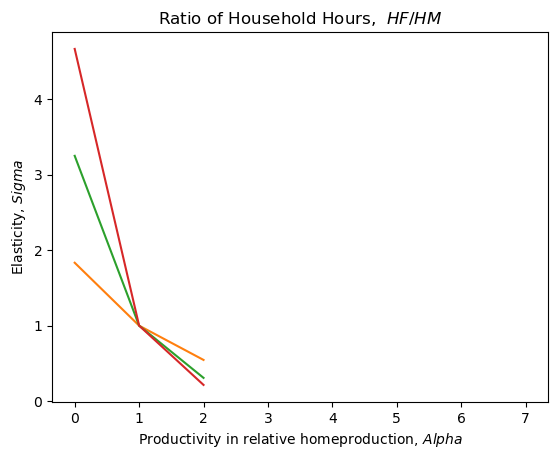

In [21]:
#create list with new values of alpha and solve
al = [0.25, .5, .75]

#create list with new values of sigma and solve
sl = [0.5, 1, 1.5]

#create an empty matrix to store the results
optm = np.zeros([3,3])

#create a loop to go trough all the values of alpha and sigma, solve the model
for it, a in enumerate(al):
    model.par.alpha = a

    for jt, s in enumerate(sl):

        model.par.sigma = s
        opt = model.solve_discrete()
        
        #fill in the values of HM/HF into the matrix optm 
        optm[it, jt] = opt.HM/opt.HF

#print the matrix
print(optm)


#plot the results 

#create empty dictionary 
res_HF = {}
res_HM = {}
res_HFHM = {}

# and store the results
res_HF = opt.HF
res_HM = opt.HM
res_HFHM = optm

# create the figure for visual presentation of the results 
fig = plt.figure()

# plot the results 
ax = fig.add_subplot(1,1,1)

ax.plot(res_HF, res_HM, res_HFHM)

# label the axes and title 
ax.set_title('Ratio of Household Hours,  $HF/HM$')
ax.set_xlabel('Productivity in relative homeproduction, $Alpha$')
ax.set_ylabel('Elasticity, $Sigma$');              

In [62]:
print(optm)

[[1.83333333 3.25       4.66666667]
 [1.         1.         1.        ]
 [0.54545455 0.30769231 0.21428571]]


Sigma is the elasticity of substiution and alpha/ (1-alpha) represents the productivity in home production for female relative to males. Therefore the productivity is equal when alpha = 0.5. In the matrix we can see how the Hours worked at Home by men and women change with alpha and sigma. 

# Question 2

Explain your code and procedure

First we reset the values of alpha and sigma to the values of the basic model, meaning alpha = 0.5 and simga = 1. We are interested by the variation of the female wage and therefore create an array with the values for wF. As in Q1 we also solve the model by looping trough all the values (here of wF). WE then stroe the results in the empty lists that we created and plot the results. 

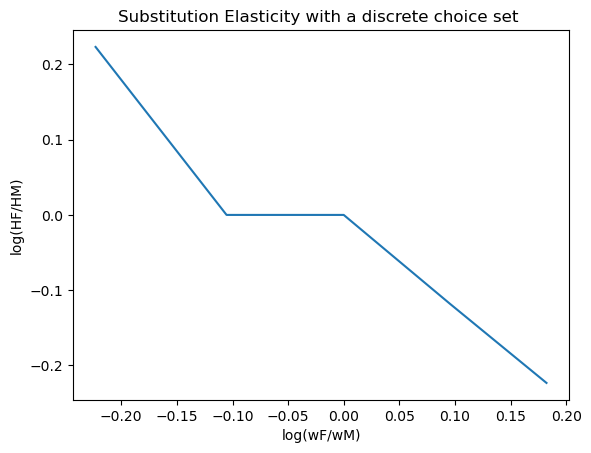

In [36]:
#reset alpha and sigma to default value

model.par.alpha = 0.5
model.par.sigma = 1

#create list with new values of WF
wF_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

#create empty lists for storing results
log_HF_HM = np.zeros(5)
log_WF_WM = np.zeros(5)

#loop trough all the values of wF 

for i, wFl in enumerate(wF_values):
    model.par.wF = wFl
    opt = model.solve_discrete()

    #and store the results 
    log_HF_HM[i] = np.log(opt.HF/opt.HM)
    log_WF_WM[i] = np.log(model.par.wF/model.par.wM)

#set title
title = 'Substitution Elasticity with a discrete choice set '

#call function plot figure 
model.plot_results(log_WF_WM, log_HF_HM, title)





We can conclude that the sexe that has the higher relative wage will work less at home. 

# Question 3

Our function uses the SciPy library to minimize the objective function defined in the obj function, which takes four inputs (x[0], x[1], x[2], x[3]) and calculates the utility of those values. The objective function is set up to maximize (-opt) the utility.

The method then iterates over a vector of wage ratios (par.wF_vec) and for each ratio, it finds the optimal values of x that maximize the utility. The optimize.minimize function takes the obj function, an initial guess for the values of x (x0=[12.0]*4), and bounds on the values of x ([(0,24)]*4) and returns the optimal values of x.

The method then saves the optimal values of x for each wage ratio in the sol object, which is a dictionary containing vectors for each variable (HM_vec, HF_vec, LM_vec, LF_vec).

In [32]:
model = inauguralproject.inauguralproject()
model.solve()
model.sol
model.run_regression()

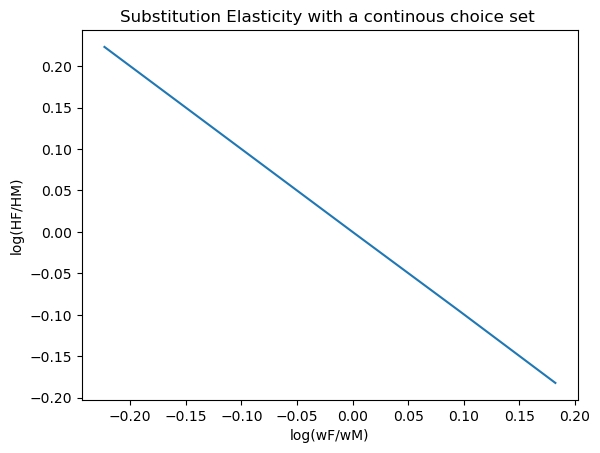

In [38]:
# calculate HF/HM and wF/wM
HFHM = model.sol.HF_vec / model.sol.HM_vec
wFwM = model.par.wF_vec / model.par.wM

# take logarithm of both
log_HFHM = np.log(HFHM)
log_wFwM = np.log(wFwM)

#set title
title = 'Substitution Elasticity with a continous choice set '

#call function plot figure 
model.plot_results(log_wFwM, log_HFHM, title)


For the graph, we can conclude that in continous set the one who has the higher relative wage will have more hours working at home. 

Question 4 

We use the estimate() code to find the alpha and sigma that minimizes the requirement

In [69]:
A,S,Var = model.estimate()

print('alpha =', A)
print('sigma =', S)


c:\Users\Archie\Desktop\programing\projects-2023-newteam-2\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1- par.alpha)*HM**((par.sigma -1)/par.sigma)+ par.alpha*HF**((par.sigma -1)/par.sigma))**(par.sigma/(par.sigma - 1))
c:\Users\Archie\Desktop\programing\projects-2023-newteam-2\inauguralproject\inauguralproject.py:61: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1- par.alpha)*HM**((par.sigma -1)/par.sigma)+ par.alpha*HF**((par.sigma -1)/par.sigma))**(par.sigma/(par.sigma - 1))
c:\Users\Archie\Desktop\programing\projects-2023-newteam-2\inauguralproject\inauguralproject.py:162: RuntimeWarning: divide by zero encountered in log
  y = np.log(sol.HF_vec/sol.HM_vec)


alpha = 0.9473684210526315
sigma = 0.15789473684210525


c:\Users\Archie\Desktop\programing\projects-2023-newteam-2\inauguralproject\inauguralproject.py:162: RuntimeWarning: divide by zero encountered in divide
  y = np.log(sol.HF_vec/sol.HM_vec)


The code gives alpha = 0.947 and sigma = 0.158

Question 5

For solve the Q5, we set the α = 0.50 and then calculate σ to fit the β0 and β1. We use the new model estimate1 to caculate the value of sigma.

In [70]:
#choose alpha such that Male and Female are equally productive
model.par.alpha = 0.5
model.estimate1()
print('sigma =', model.par.sigma)

c:\Users\Archie\Desktop\programing\projects-2023-newteam-2\inauguralproject\inauguralproject.py:61: RuntimeWarning: overflow encountered in double_scalars
  H = ((1- par.alpha)*HM**((par.sigma -1)/par.sigma)+ par.alpha*HF**((par.sigma -1)/par.sigma))**(par.sigma/(par.sigma - 1))


sigma = 0.09646760225295938


Set the fixed alpha, and we get the another different value of sigma. From economic insights, we can infer that, due to differences in gender roles in society, there often exists an unequal distribution of household work between men and women in families. To eliminate this inequality, it is necessary to consider changing the division of labor within the household. 